In [1]:
library(brms)
theme_set(theme_default())

Loading required package: Rcpp
Loading required package: ggplot2
Loading 'brms' package (version 2.4.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').
Run theme_set(theme_default()) to use the default bayesplot theme.


# Load data

In [2]:
# load RData into environment object ("ex")
load("./prepped_data.RData", ex <- new.env())

In [3]:
# Load data from environment.
# For testing, we're using df_slice, which has only subjects 1 an 2.
#df <- ex$df_slice
df <- ex$df_total

In [4]:
head(df)

Answer,Block,CD,Choice,ED,RT,Trlnum,conNT,conNT_cent,item_id,newNT,newNT_cent,sub,task,task_order,ec_b2,ec_b3,ec_task,ec_taskorder
1,0,1.140978,0,15.32376,1.762020,0,8.711341,-0.02945527,16.0,6.996014,0.002536885,1,disc,ver1,-1,-1,-1,1
0,1,1.140978,1,15.32376,2.242939,33,8.711341,-0.02945527,16.0,6.996014,0.002536885,1,disc,ver1,1,0,-1,1
1,2,1.140978,0,15.32376,1.766368,39,8.711341,-0.02945527,16.0,6.996014,0.002536885,1,disc,ver1,0,1,-1,1
1,0,1.140978,0,15.32376,2.559490,38,8.711341,-0.02945527,16.0,6.996014,0.002536885,2,disc,ver1,-1,-1,-1,1
1,2,1.140978,0,15.32376,2.417423,51,8.711341,-0.02945527,16.0,6.996014,0.002536885,2,disc,ver1,0,1,-1,1
0,0,1.140978,1,15.32376,1.718840,2,8.711341,-0.02945527,16.0,6.996014,0.002536885,3,disc,ver2,-1,-1,-1,-1


In [5]:
str(df)

'data.frame':	11683 obs. of  19 variables:
 $ Answer      : Factor w/ 2 levels "0","1": 2 1 2 2 2 1 1 2 2 2 ...
 $ Block       : Factor w/ 3 levels "0","1","2": 1 2 3 1 3 1 2 3 1 2 ...
 $ CD          : num  1.14 1.14 1.14 1.14 1.14 ...
 $ Choice      : int  0 1 0 0 0 1 2 0 0 0 ...
 $ ED          : num  15.3 15.3 15.3 15.3 15.3 ...
 $ RT          : num  1.76 2.24 1.77 2.56 2.42 ...
 $ Trlnum      : int  0 33 39 38 51 2 51 46 31 6 ...
 $ conNT       : num  8.71 8.71 8.71 8.71 8.71 ...
 $ conNT_cent  : num  -0.0295 -0.0295 -0.0295 -0.0295 -0.0295 ...
 $ item_id     : Factor w/ 64 levels "0.0","1.0","10.0",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ newNT       : num  7 7 7 7 7 ...
 $ newNT_cent  : num  0.00254 0.00254 0.00254 0.00254 0.00254 ...
 $ sub         : Factor w/ 32 levels "1","10","11",..: 1 1 1 12 12 23 23 23 27 27 ...
 $ task        : Factor w/ 2 levels "disc","name": 1 1 1 1 1 1 1 1 1 1 ...
 $ task_order  : Factor w/ 2 levels "ver1","ver2": 1 1 1 1 1 2 2 2 2 2 ...
 $ ec_b2       : num  -1

# Null models

In [6]:
# assume only main effects for all our nuisance predictors (block, task, task_order)
# as fixed effects and random slopes across subjects
# with varying intercept for item_id
# Answer ~ ec_b2 + ec_b3 + task + task_order + (ec_b2 + ec_b3 + task + task_order|sub) + (1|item_id),
answer_nullmodel <- brm(Answer ~ ec_b2 + ec_b3 + task + task_order + (ec_b2 + ec_b3 + task + task_order|sub) + (1|item_id),
                        data=df,
                        family=bernoulli,
                        file="answer_nullmodel",
                        sample_prior=TRUE, save_all_pars=TRUE,
                        chains=2, cores=2)

In [7]:
# additional interaction between task and block
# Answer ~ ec_b2 + ec_b3 + task + ec_b2:task + ec_b3:task + task_order + (1|ec_b2 + ec_b3 + task + ec_b2:task + ec_b3:task + task_order) + (1|item_id),
answer_nullmodel2 <- brm(Answer ~ ec_b2 + ec_b3 + task + ec_b2:task + ec_b3:task + task_order + (1|ec_b2 + ec_b3 + task + ec_b2:task + ec_b3:task + task_order) + (1|item_id),
                        data=df,
                        family=bernoulli,
                        file="answer_nullmodel2",
                        sample_prior=TRUE, save_all_pars=TRUE,
                        chains=2, cores=2)

In [8]:
# interaction between task_order and block
# Answer ~ ec_b2 + ec_b3 + task_order + ec_b2:task_order + ec_b3:task_order + task + (1|ec_b2 + ec_b3 + task_order + ec_b2:task_order + ec_b3:task_order + task) + (1|item_id),
answer_nullmodel3 <- brm(Answer ~ ec_b2 + ec_b3 + task_order + ec_b2:task_order + ec_b3:task_order + task + (1|ec_b2 + ec_b3 + task_order + ec_b2:task_order + ec_b3:task_order + task) + (1|item_id),
                        data=df,
                        family=bernoulli,
                        file="answer_nullmodel3",
                        sample_prior=TRUE, save_all_pars=TRUE,
                        chains=2, cores=2)

In [9]:
# interaction between task and task_order
# Answer ~ ec_b2 + ec_b3 + task + task_order + task:task_order + (ec_b2 + ec_b3 + task + task_order + task:task_order|sub) + (1|item_id),
answer_nullmodel4 <- brm(Answer ~ ec_b2 + ec_b3 + task + task_order + task:task_order + (ec_b2 + ec_b3 + task + task_order + task:task_order|sub) + (1|item_id),
                        data=df,
                        family=bernoulli,
                        file="answer_nullmodel4",
                        sample_prior=TRUE, save_all_pars=TRUE,
                        chains=2, cores=2,
                        inits=0)

In [10]:
# all interactions (block, task, and task order)
# This is pretty long ...
# Answer ~ ec_b2 + ec_b3 + task + task_order + task:task_order + ec_b2:task + ec_b3:task + ec_b2:task:task_order + ec_b3:task:task_order + (ec_b2 + ec_b3 + task + task_order + task:task_order + ec_b2:task + ec_b3:task + ec_b2:task:task_order + ec_b3:task:task_order|sub) + (1|item_id)
answer_nullmodel5 <- brm(Answer ~ ec_b2 + ec_b3 + task + task_order + task:task_order + ec_b2:task + ec_b3:task + ec_b2:task:task_order + ec_b3:task:task_order + (ec_b2 + ec_b3 + task + task_order + task:task_order + ec_b2:task + ec_b3:task + ec_b2:task:task_order + ec_b3:task:task_order|sub) + (1|item_id),
                        data=df,
                        family=bernoulli,
                        file="answer_nullmodel5",
                        sample_prior=TRUE, save_all_pars=TRUE,
                        chains=2, cores=2,
                        inits=0)

Compare null models:

In [11]:
# takes a while to run
loo_nullmodcomp <- loo(answer_nullmodel, answer_nullmodel2, answer_nullmodel3, answer_nullmodel4, answer_nullmodel5)

In [12]:
loo_nullmodcomp

                                         LOOIC    SE
answer_nullmodel                      13515.12 94.89
answer_nullmodel2                     14139.10 84.51
answer_nullmodel3                     14119.90 84.82
answer_nullmodel4                     13510.96 94.93
answer_nullmodel5                     13515.86 95.48
answer_nullmodel - answer_nullmodel2   -623.98 52.67
answer_nullmodel - answer_nullmodel3   -604.78 52.75
answer_nullmodel - answer_nullmodel4      4.16  4.20
answer_nullmodel - answer_nullmodel5     -0.74  7.80
answer_nullmodel2 - answer_nullmodel3    19.21  9.24
answer_nullmodel2 - answer_nullmodel4   628.15 52.89
answer_nullmodel2 - answer_nullmodel5   623.25 53.62
answer_nullmodel3 - answer_nullmodel4   608.94 53.04
answer_nullmodel3 - answer_nullmodel5   604.04 53.20
answer_nullmodel4 - answer_nullmodel5    -4.90  7.14

Null model 4 is the best (with interaction between task and task order), though closely en par with 1 and 5.

Hence, our typicality models will be assigned the same rfx structure as null model number 4.

## Try to reduce complexity by looking at posteriors

- plot posteriors of the most complex null model (5).
- focus on random effects (sd)
- See which posteriors have probability mass mostly around zero
- remove these as varying effects and re-run

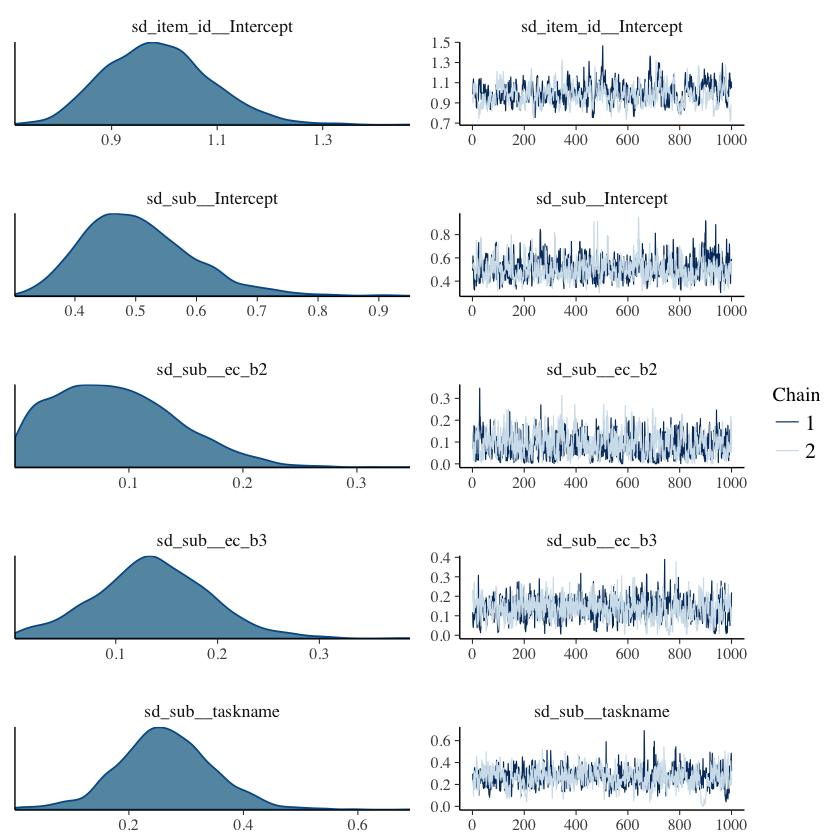

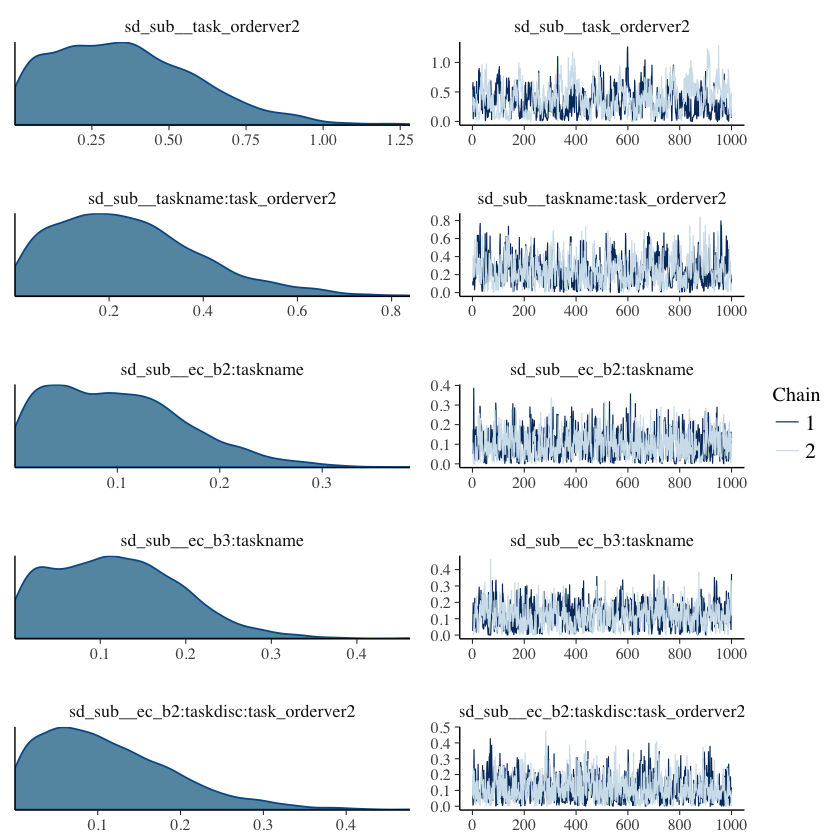

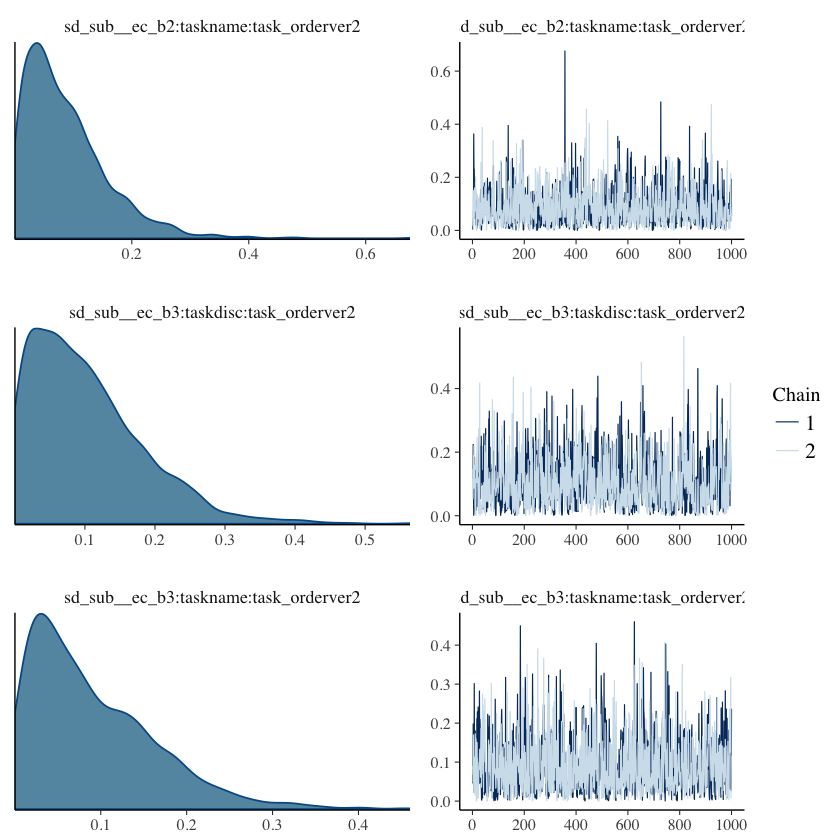

In [15]:
plot(answer_nullmodel5, pars="^sd")

SDs of interactions seem to have little effect. Remove them and re-run.

# Neural typicality models

In [10]:
# Add the newfound neural typicality measure to the model
answer_newNT <- brm(Answer ~ newNT_cent*Block*task + (newNT_cent*Block*task|sub) + (1|item_id),
                    data=df,
                    family=bernoulli,
                    file="answer_newNT",
                    sample_prior=TRUE, save_all_pars=TRUE,
                    chains=2, cores=2)

In [11]:
#summary(answer_newNT)

In [12]:
# Model with conserved neural typicality
answer_conNT <- brm(Answer ~ conNT_cent*Block*task + (conNT_cent*Block*task|sub) + (1|item_id),
                    data=df,
                    family=bernoulli,
                    file="answer_conNT",
                    sample_prior=TRUE, save_all_pars=TRUE,
                    chains=2, cores=2)

In [13]:
#summary(answer_conNT)

In [14]:
# model with both neural typicality measures
answer_bothNT <- brm(Answer ~ newNT_cent*conNT_cent*Block*task + (newNT_cent*conNT_cent*Block*task|sub) + (1|item_id),
                    data=df,
                    family=bernoulli,
                    file="answer_bothNT",
                    sample_prior=TRUE, save_all_pars=TRUE,
                    chains=2, cores=2)

In [18]:
#summary(answer_bothNT)

Compare neural typicality models (with each other and null model)

In [19]:
# WAIC
waic_modcomp <- waic(answer_conNT, answer_newNT, answer_bothNT, answer_nullmodel3)

In [20]:
print(waic_modcomp)

                                      WAIC    SE
answer_conNT                      13515.19 95.34
answer_newNT                      13501.56 95.19
answer_bothNT                     13498.48 95.94
answer_nullmodel3                 13518.47 94.92
answer_conNT - answer_newNT          13.63 13.96
answer_conNT - answer_bothNT         16.71 12.89
answer_conNT - answer_nullmodel3     -3.27 10.63
answer_newNT - answer_bothNT          3.08 11.89
answer_newNT - answer_nullmodel3    -16.90 11.22
answer_bothNT - answer_nullmodel3   -19.98 16.39


In [21]:
# Leave-One-Out cross-validation (takes long to run)
#loo_modcomp <- loo(answer_conNT, answer_newNT, answer_bothNT, answer_nullmodel)
#print(loo_modcomp)

In [22]:
# retrieve individual fit measures
#waic_modcomp$answer_bothNT$estimates

Order of model fit (smaller values indicate better model):

- WAIC:
    - both NT < new NT < con NT < null model
    - For both NT & new NT, the difference to the null model is larger than the SE. 
    - The difference between con NT and null model is much smaller than the SE.
    - The difference between new NT and both NT is also much smaller than the SE.

# Visualization

In [23]:
# all posteriors
#plot(answer_newNT, ask = FALSE)

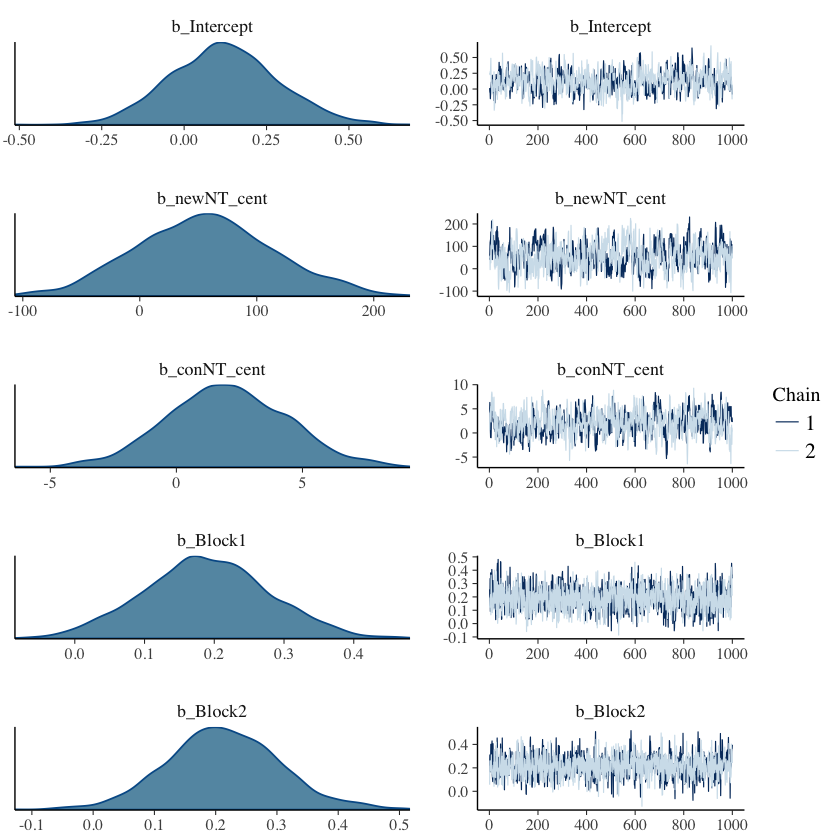

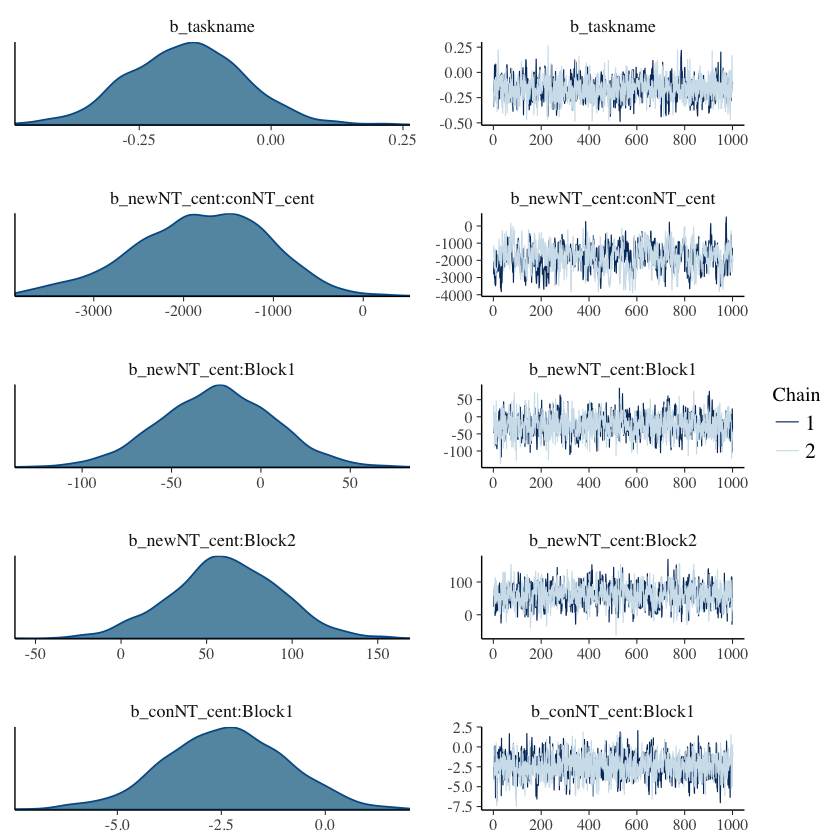

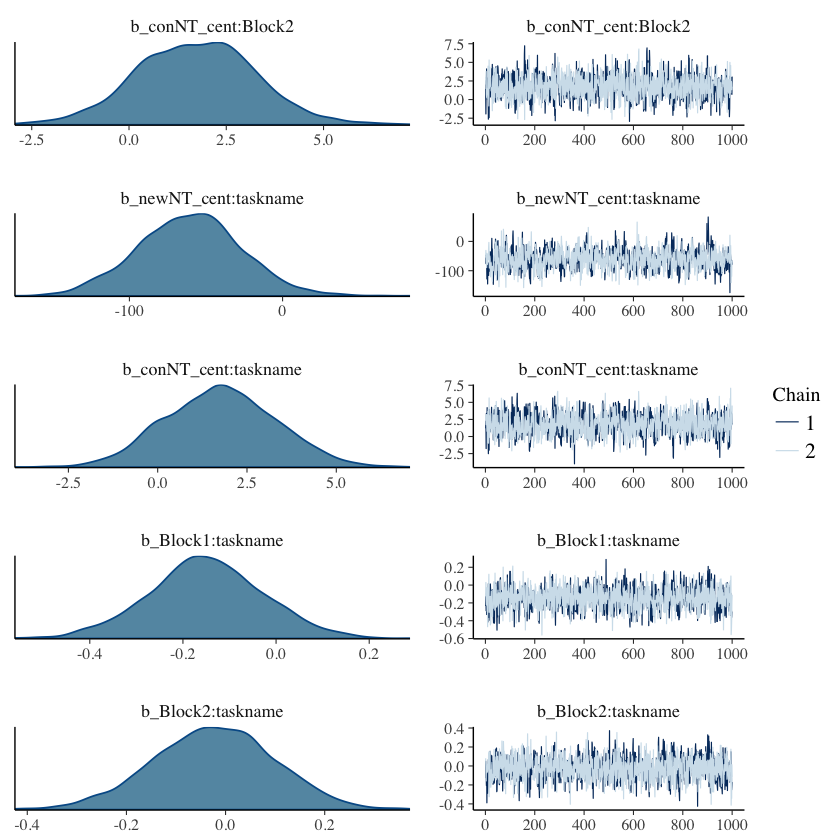

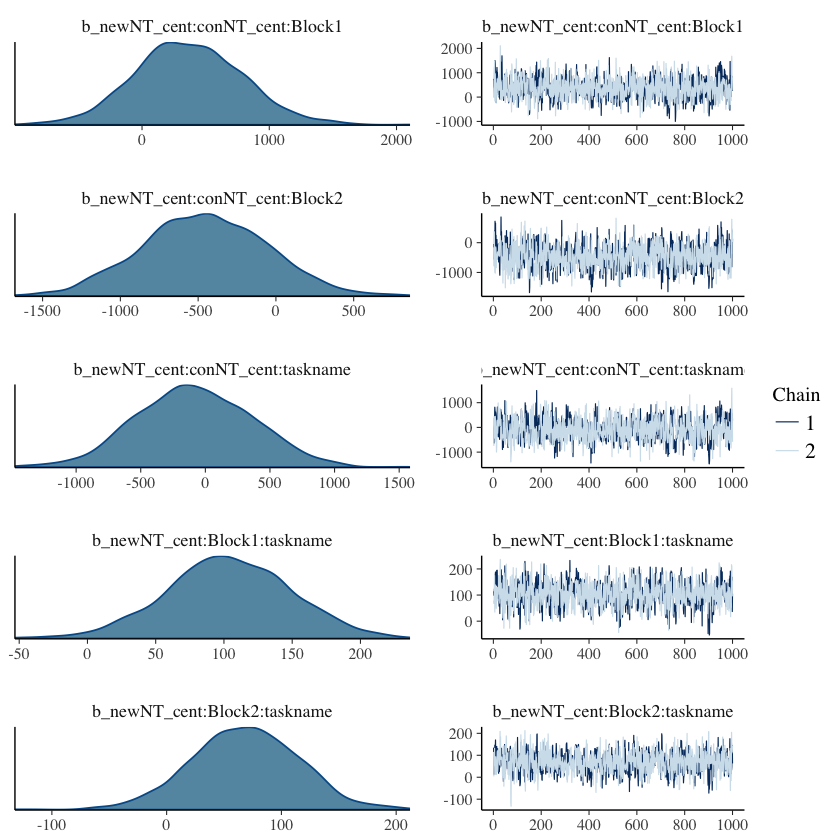

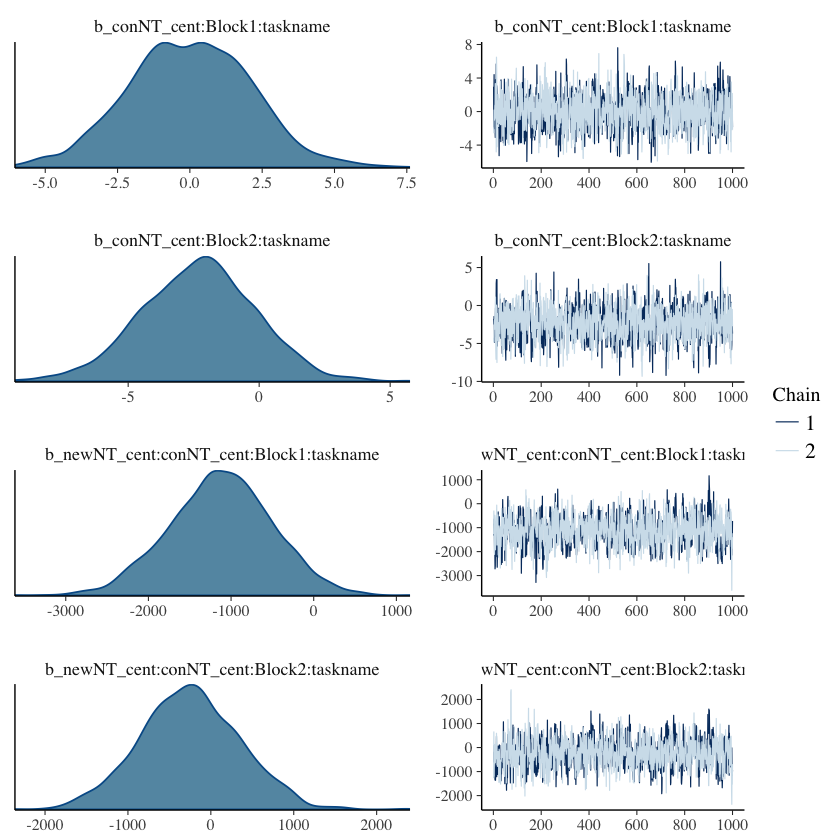

In [24]:
# Only regression weights posteriors
plot(answer_bothNT, pars="^b")

In [25]:
# check distribution of predictions
#pp_check(answer_bothNT)

Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(Liste oder Vektor) des Typs 'NULL' angewendet”Warning message in is.na(x):
“is.na() auf nicht-(L

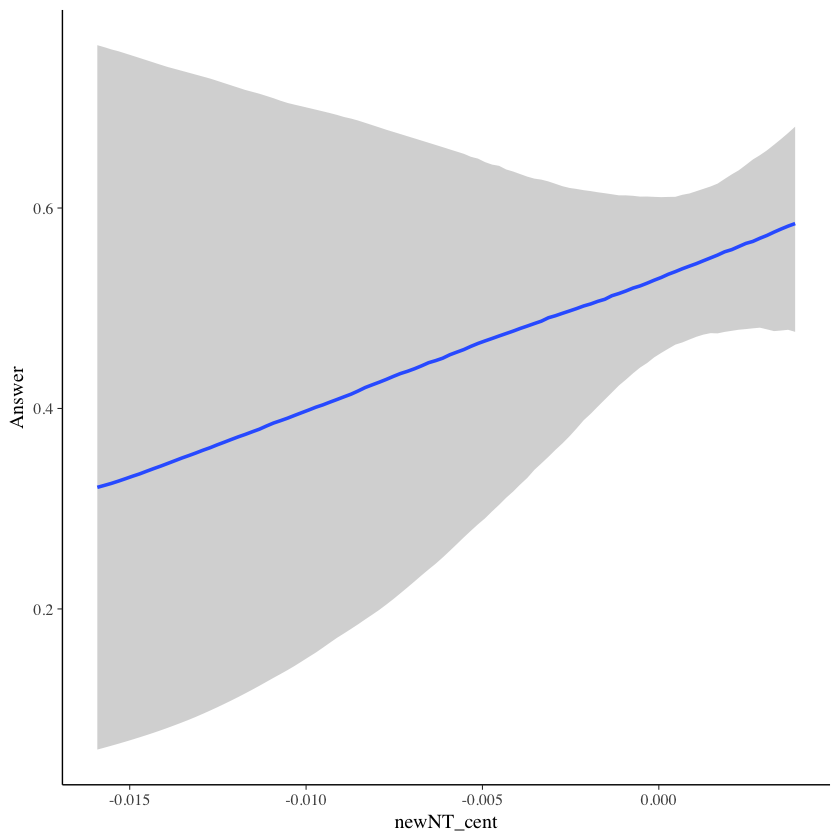

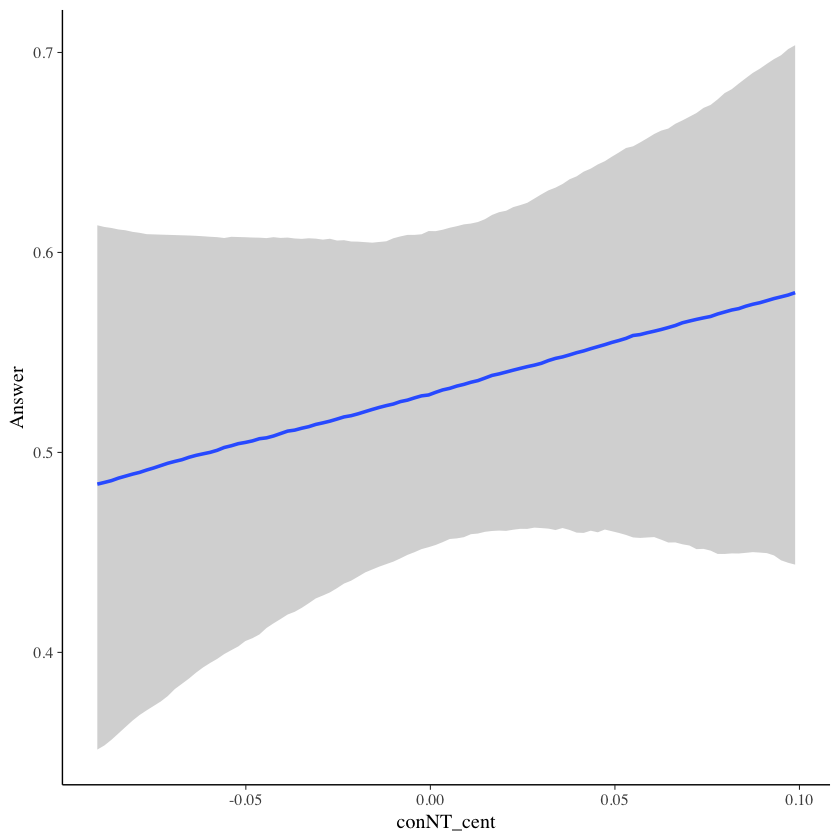

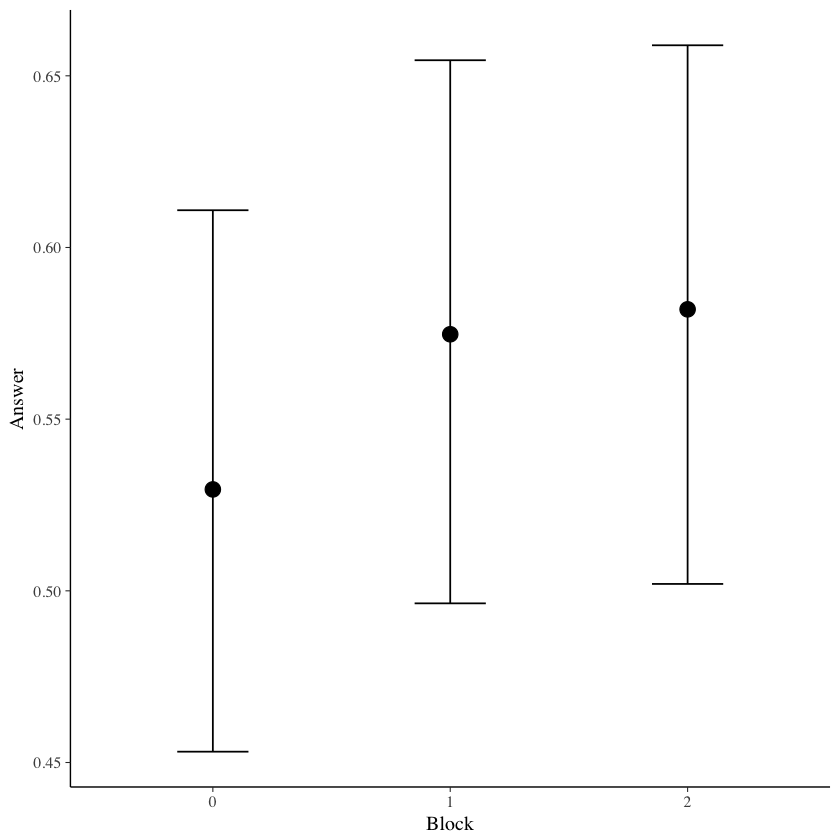

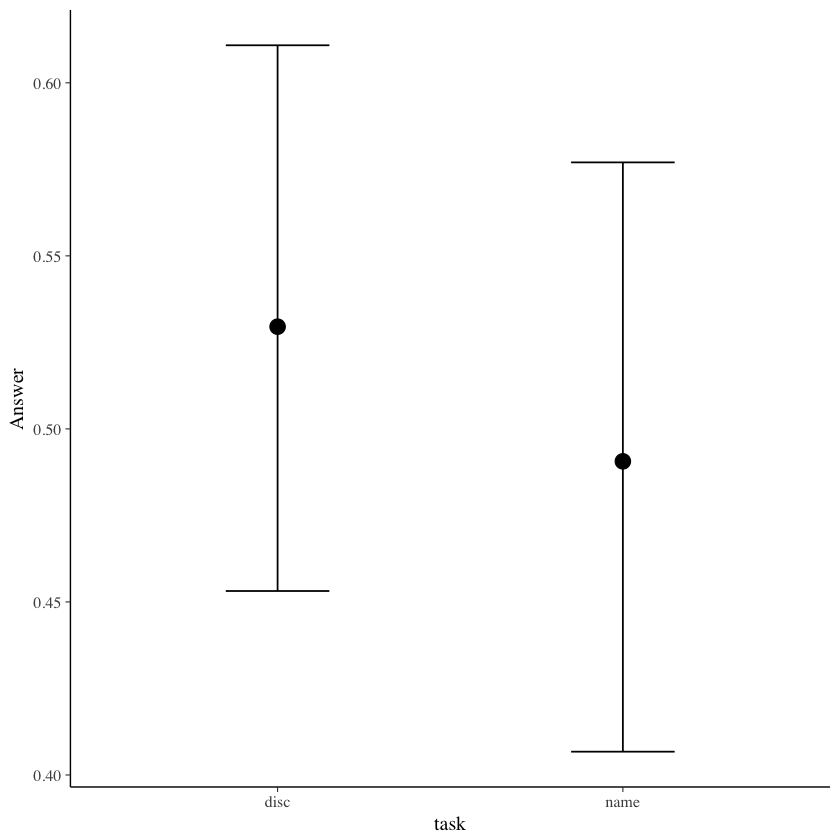

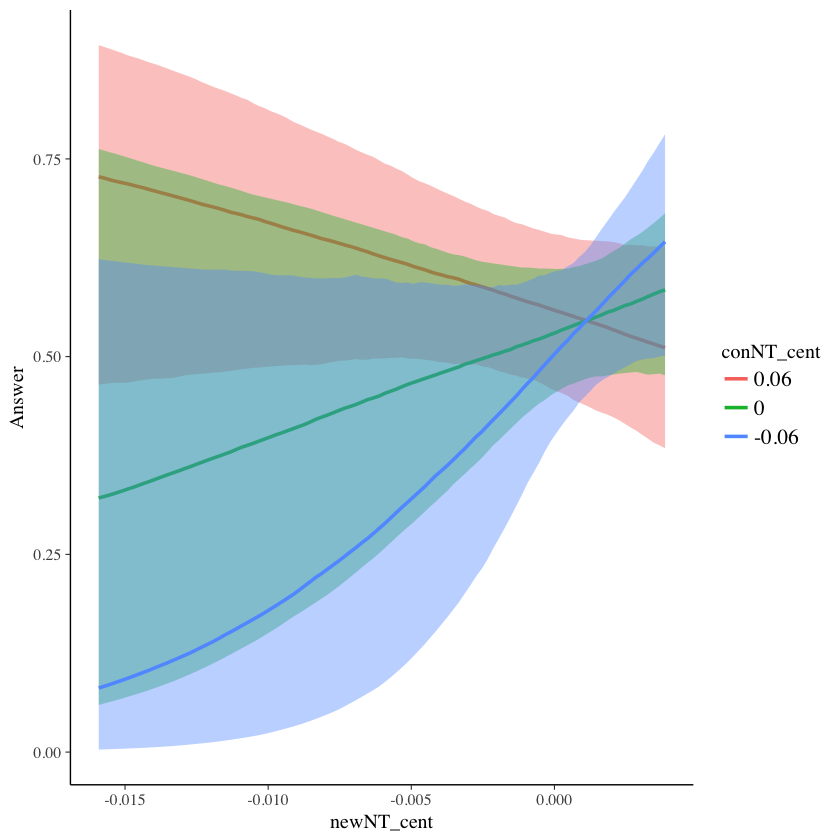

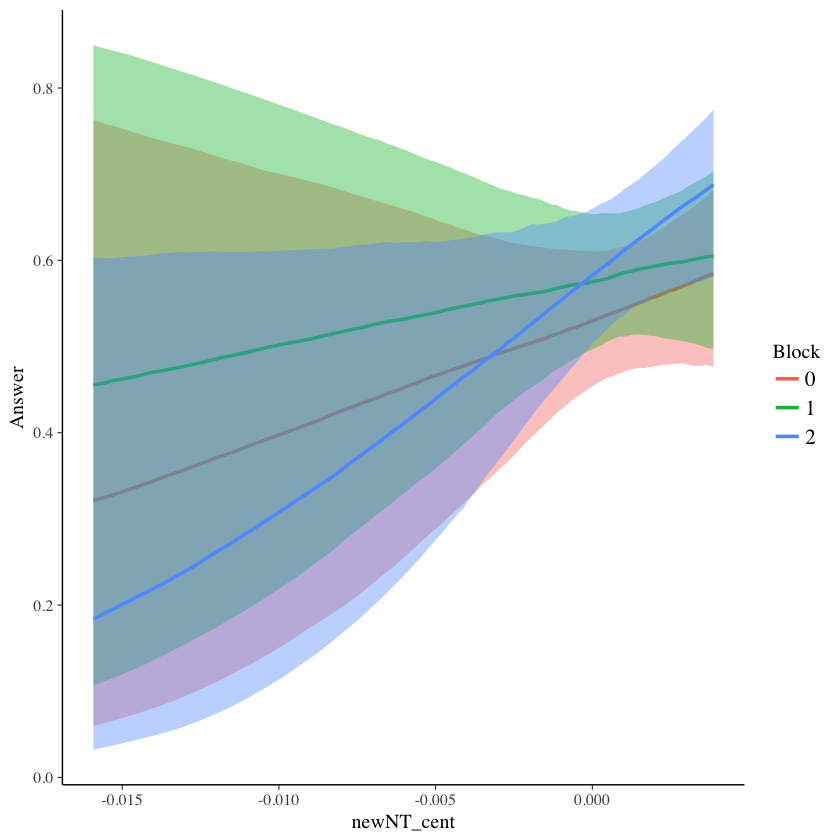

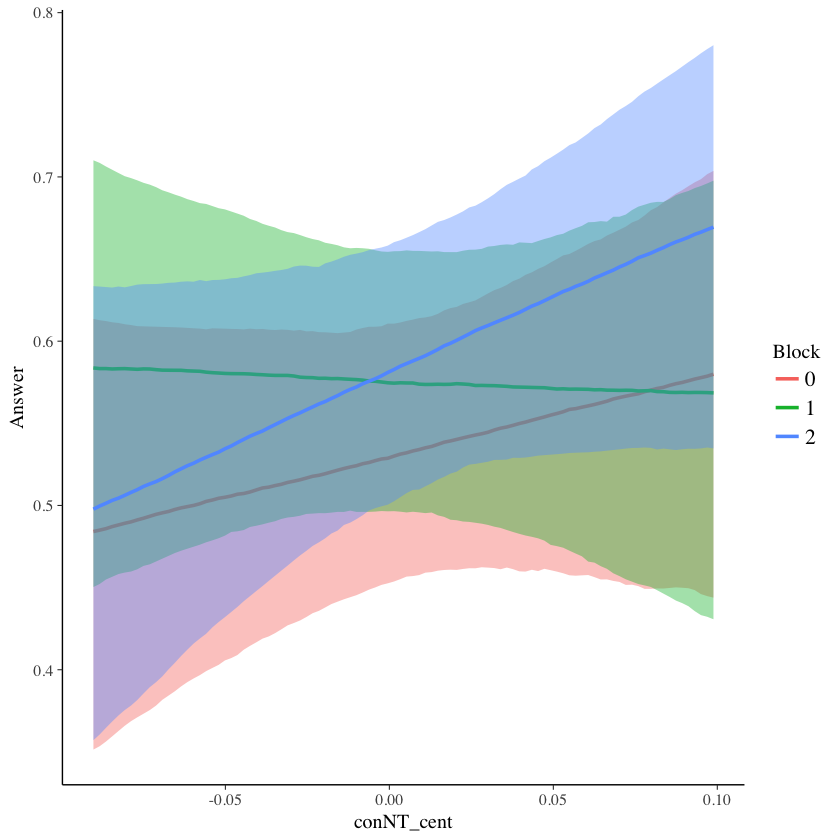

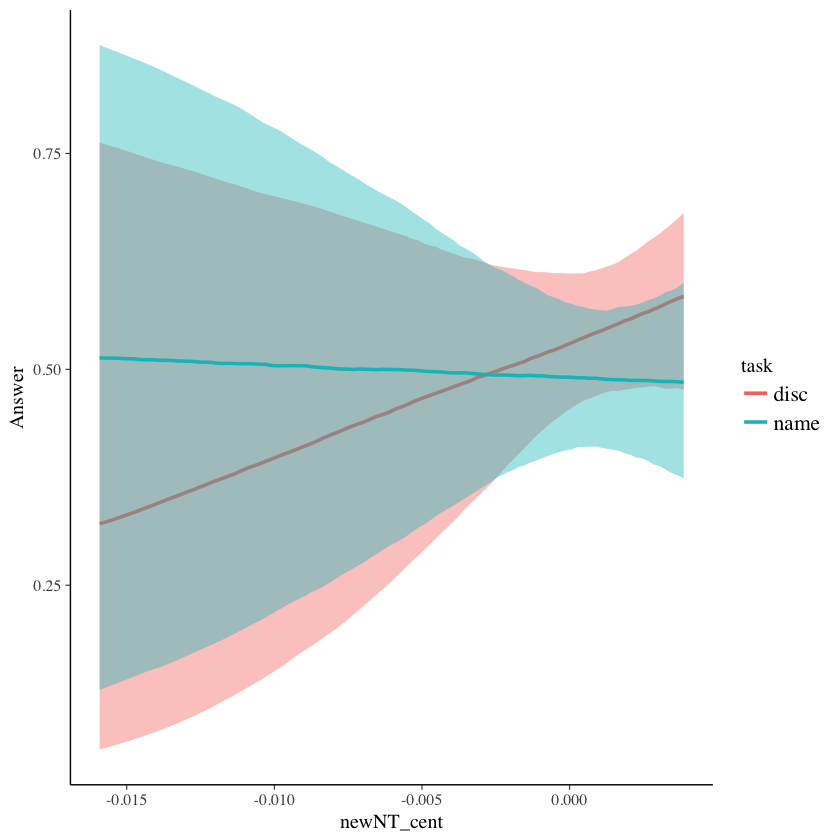

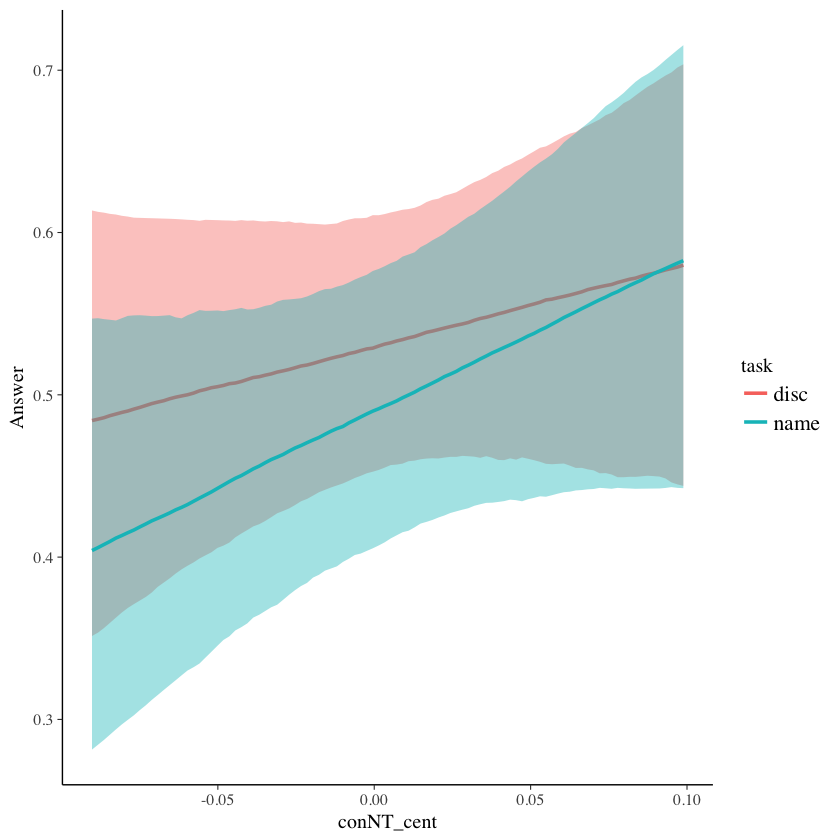

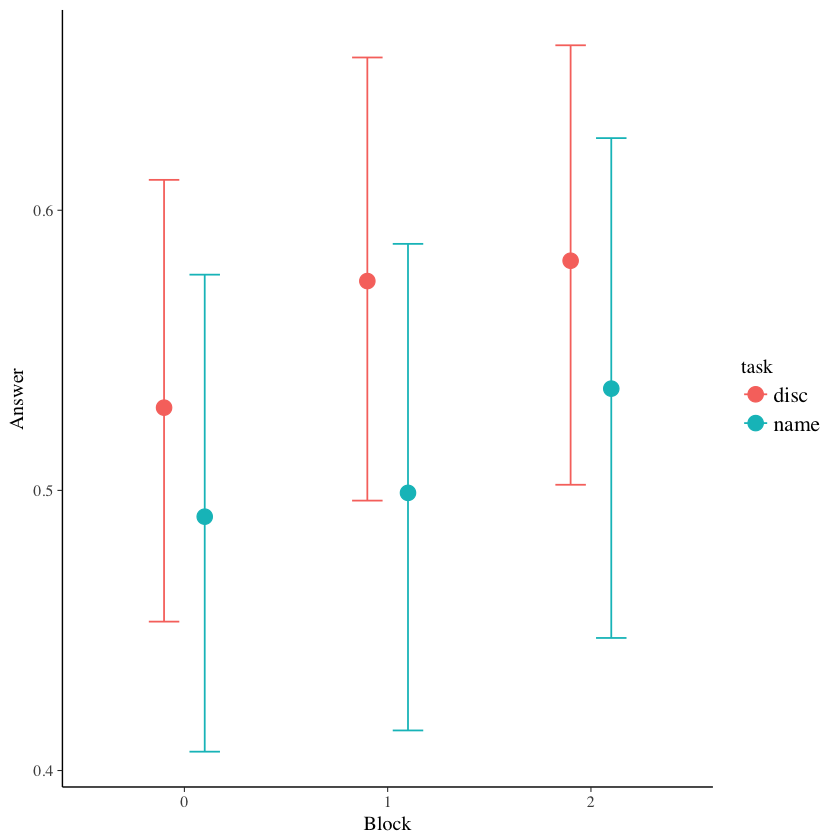

In [26]:
# Prediction by marginalized effects
plot(marginal_effects(answer_bothNT), ask = FALSE)

# Sandbox

## Hypothesis testing (main effects)

In [19]:
prior <- get_prior(Answer ~ conNT_cent*Block*task + (conNT_cent*Block*task|sub) + (1|item_id),
                  data=df,
                  family=bernoulli)

In [25]:
# set prior for all population level effects at once.
# problem, their posteriors have drastically different ranges (see above).
#prior$prior[1] <- "normal(0,10)"

# set prior for the beta weight of specific predictor (x1)
#set_prior("normal(0,5)", class = "b", coef = "x1")



prior,class,coef,group,resp,dpar,nlpar,bound
"normal(0,5)",b,,,,,,


prior,class,coef,group,resp,dpar,nlpar,bound
,b,,,,,,
,b,Block1,,,,,
,b,Block1:taskname,,,,,
,b,Block2,,,,,
,b,Block2:taskname,,,,,
,b,conNT_cent,,,,,
,b,conNT_cent:Block1,,,,,
,b,conNT_cent:Block1:taskname,,,,,
,b,conNT_cent:Block2,,,,,
,b,conNT_cent:Block2:taskname,,,,,


In [23]:
prior

prior,class,coef,group,resp,dpar,nlpar,bound
"normal(0,10)",b,,,,,,
,b,Block1,,,,,
,b,Block1:taskname,,,,,
,b,Block2,,,,,
,b,Block2:taskname,,,,,
,b,conNT_cent,,,,,
,b,conNT_cent:Block1,,,,,
,b,conNT_cent:Block1:taskname,,,,,
,b,conNT_cent:Block2,,,,,
,b,conNT_cent:Block2:taskname,,,,,


In [ ]:
answer_conNT <- brm(Answer ~ conNT_cent*Block*task + (conNT_cent*Block*task|sub) + (1|item_id),
                    data=df,
                    family=bernoulli,
                    file="answer_conNT",
                    sample_prior=TRUE, save_all_pars=TRUE,
                    chains=2, cores=2)

In [27]:
#model_weights(answer_bothNT)  # takes long

In [28]:
hblock1 <- hypothesis(answer_bothNT, "Block1 = 0")

In [29]:
print(hblock1)

Hypothesis Tests for class b:
    Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (Block1) = 0     0.19      0.09     0.02     0.36         NA        NA    *
---
'*': The expected value under the hypothesis lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.


In [32]:
hblock2 <- hypothesis(answer_bothNT, "Block2 = 0")

In [33]:
print(hblock2)

Hypothesis Tests for class b:
    Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob Star
1 (Block2) = 0     0.21      0.09     0.04     0.41         NA        NA    *
---
'*': The expected value under the hypothesis lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.


In [34]:
hblock3 <- hypothesis(answer_bothNT, "Block2 = Block 1")

In [35]:
print(hblock3)

Hypothesis Tests for class b:
             Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio
1 (Block2)-(Block1) = 0     0.02      0.09    -0.16     0.21         NA
  Post.Prob Star
1        NA     
---
'*': The expected value under the hypothesis lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.


So both block 2 and 3 are significantly different from block 1 (the intercept), but not from each other.

In [38]:
#thepriors <- prior_summary(answer_bothNT)

# TODO

## Interpretability

- Effect coding for categorical predictors (Block)
- Normalize all NT / ED measures by their SD

## Hypothesis testing

- Assess contrasts
- Reduce model complexity and compare with LOO
- Look for estimated SD parameters for random interactions, remove them if they don't appear significant (to reduce complexigy), and run the simpler model(s). Then do model comparison

## Outlier evaluation

- Compare models based on data including and excluding outliers.